In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('medical_cost_insurance (1).csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
for i in data:
    print(data[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [8]:
data.shape

(1338, 7)

In [11]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
OE=OrdinalEncoder()

In [14]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [16]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [17]:
data_corr=data.corr().abs()

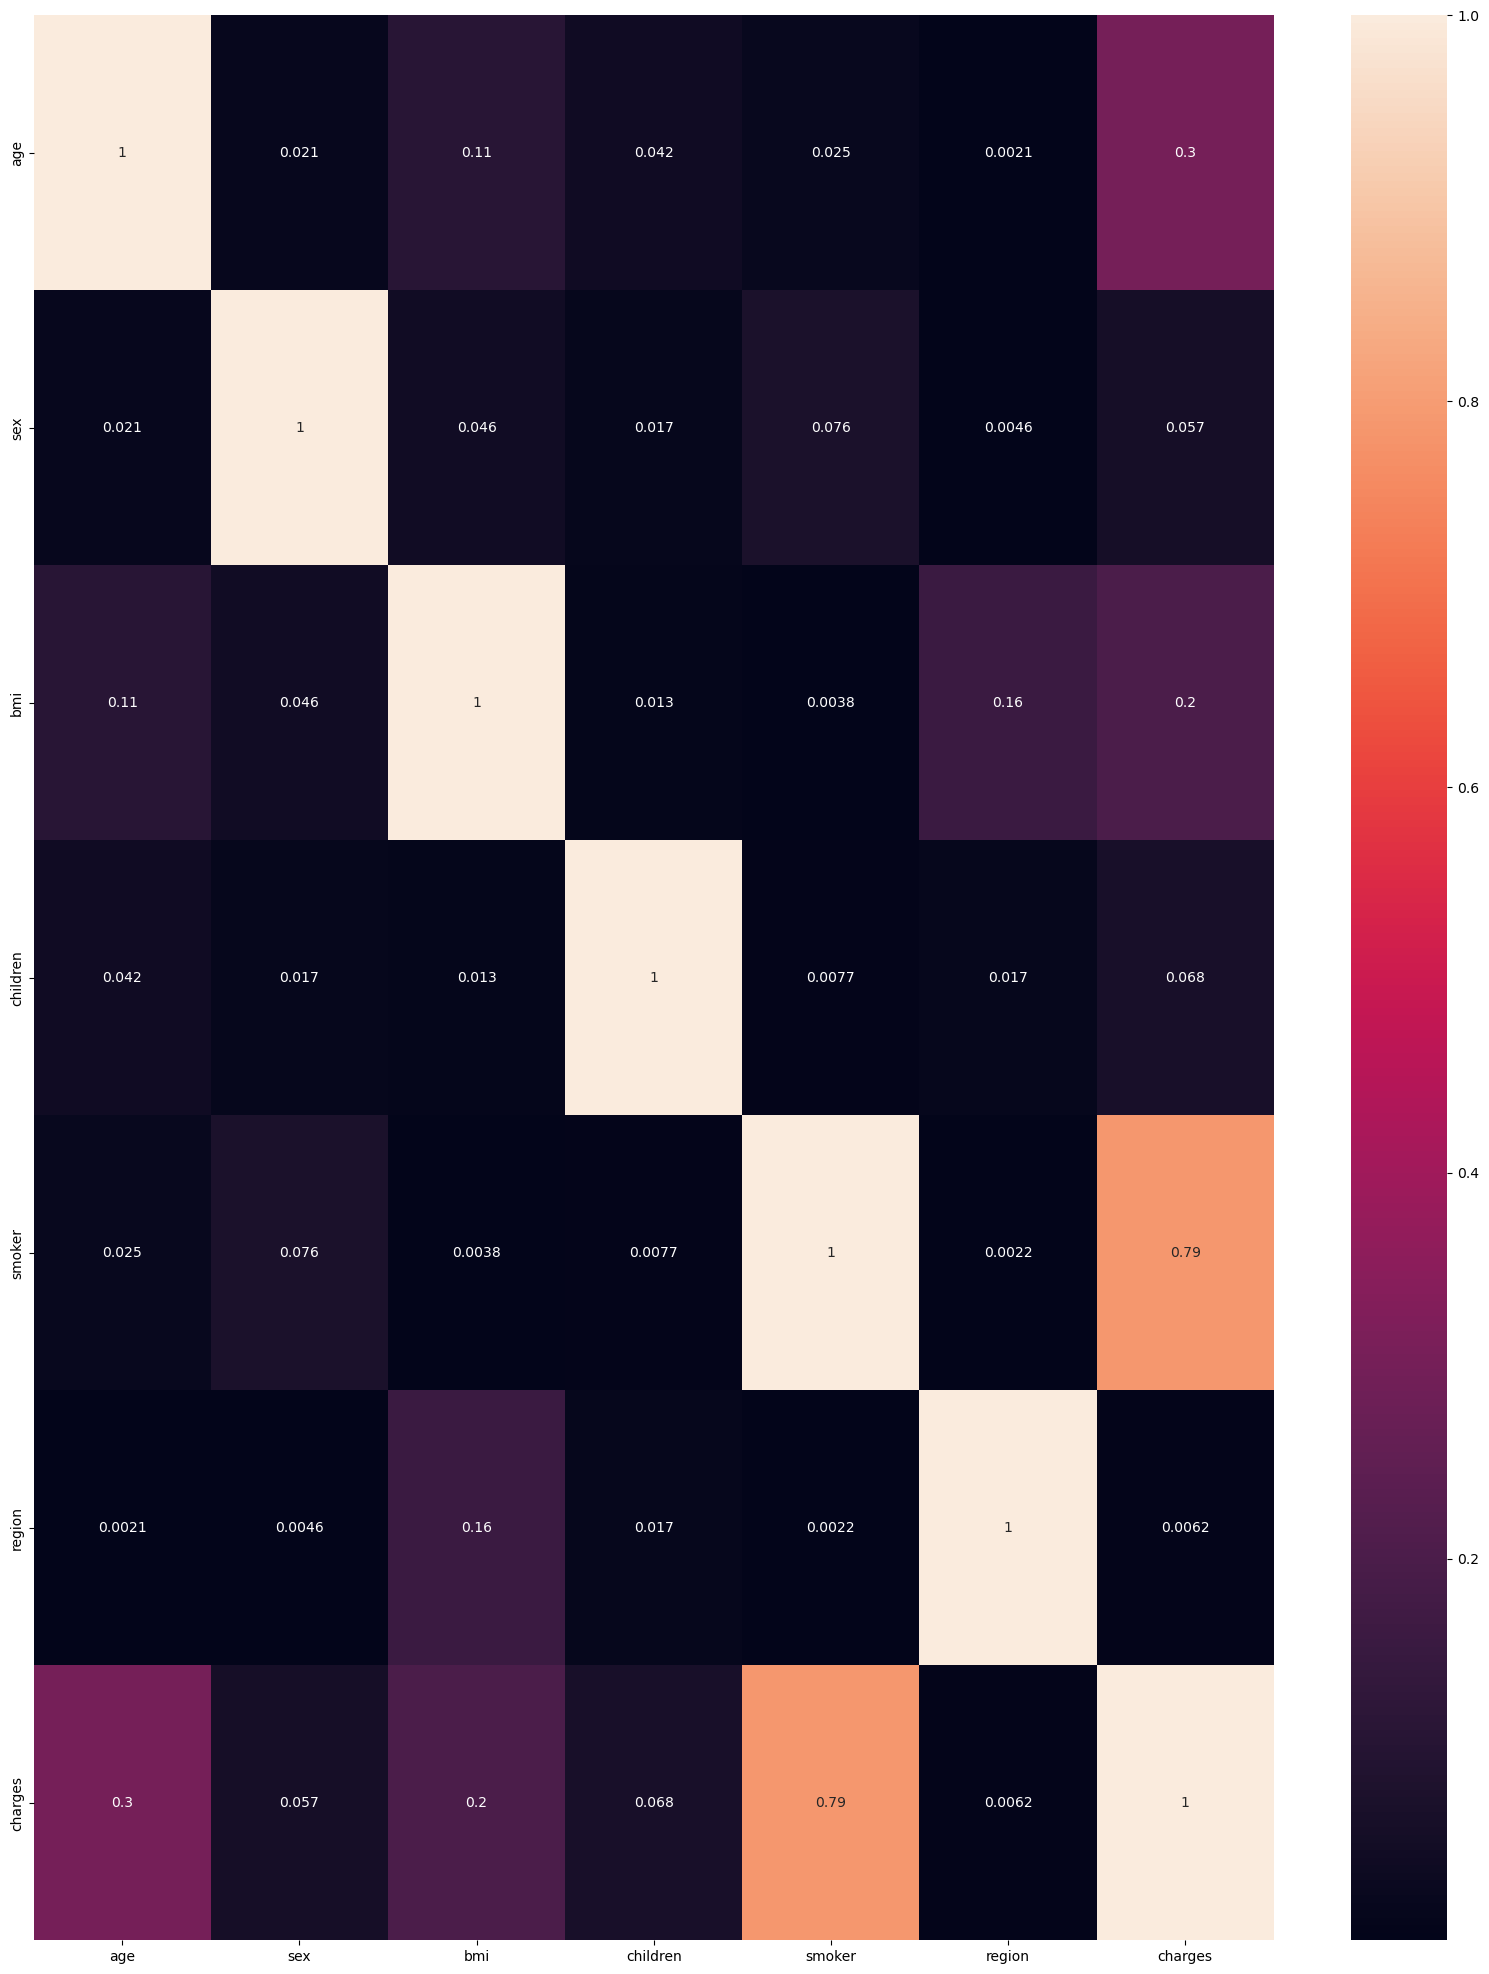

In [18]:
plt.figure(figsize=(20,25))
sns.heatmap(data_corr,annot=True)
plt.show()

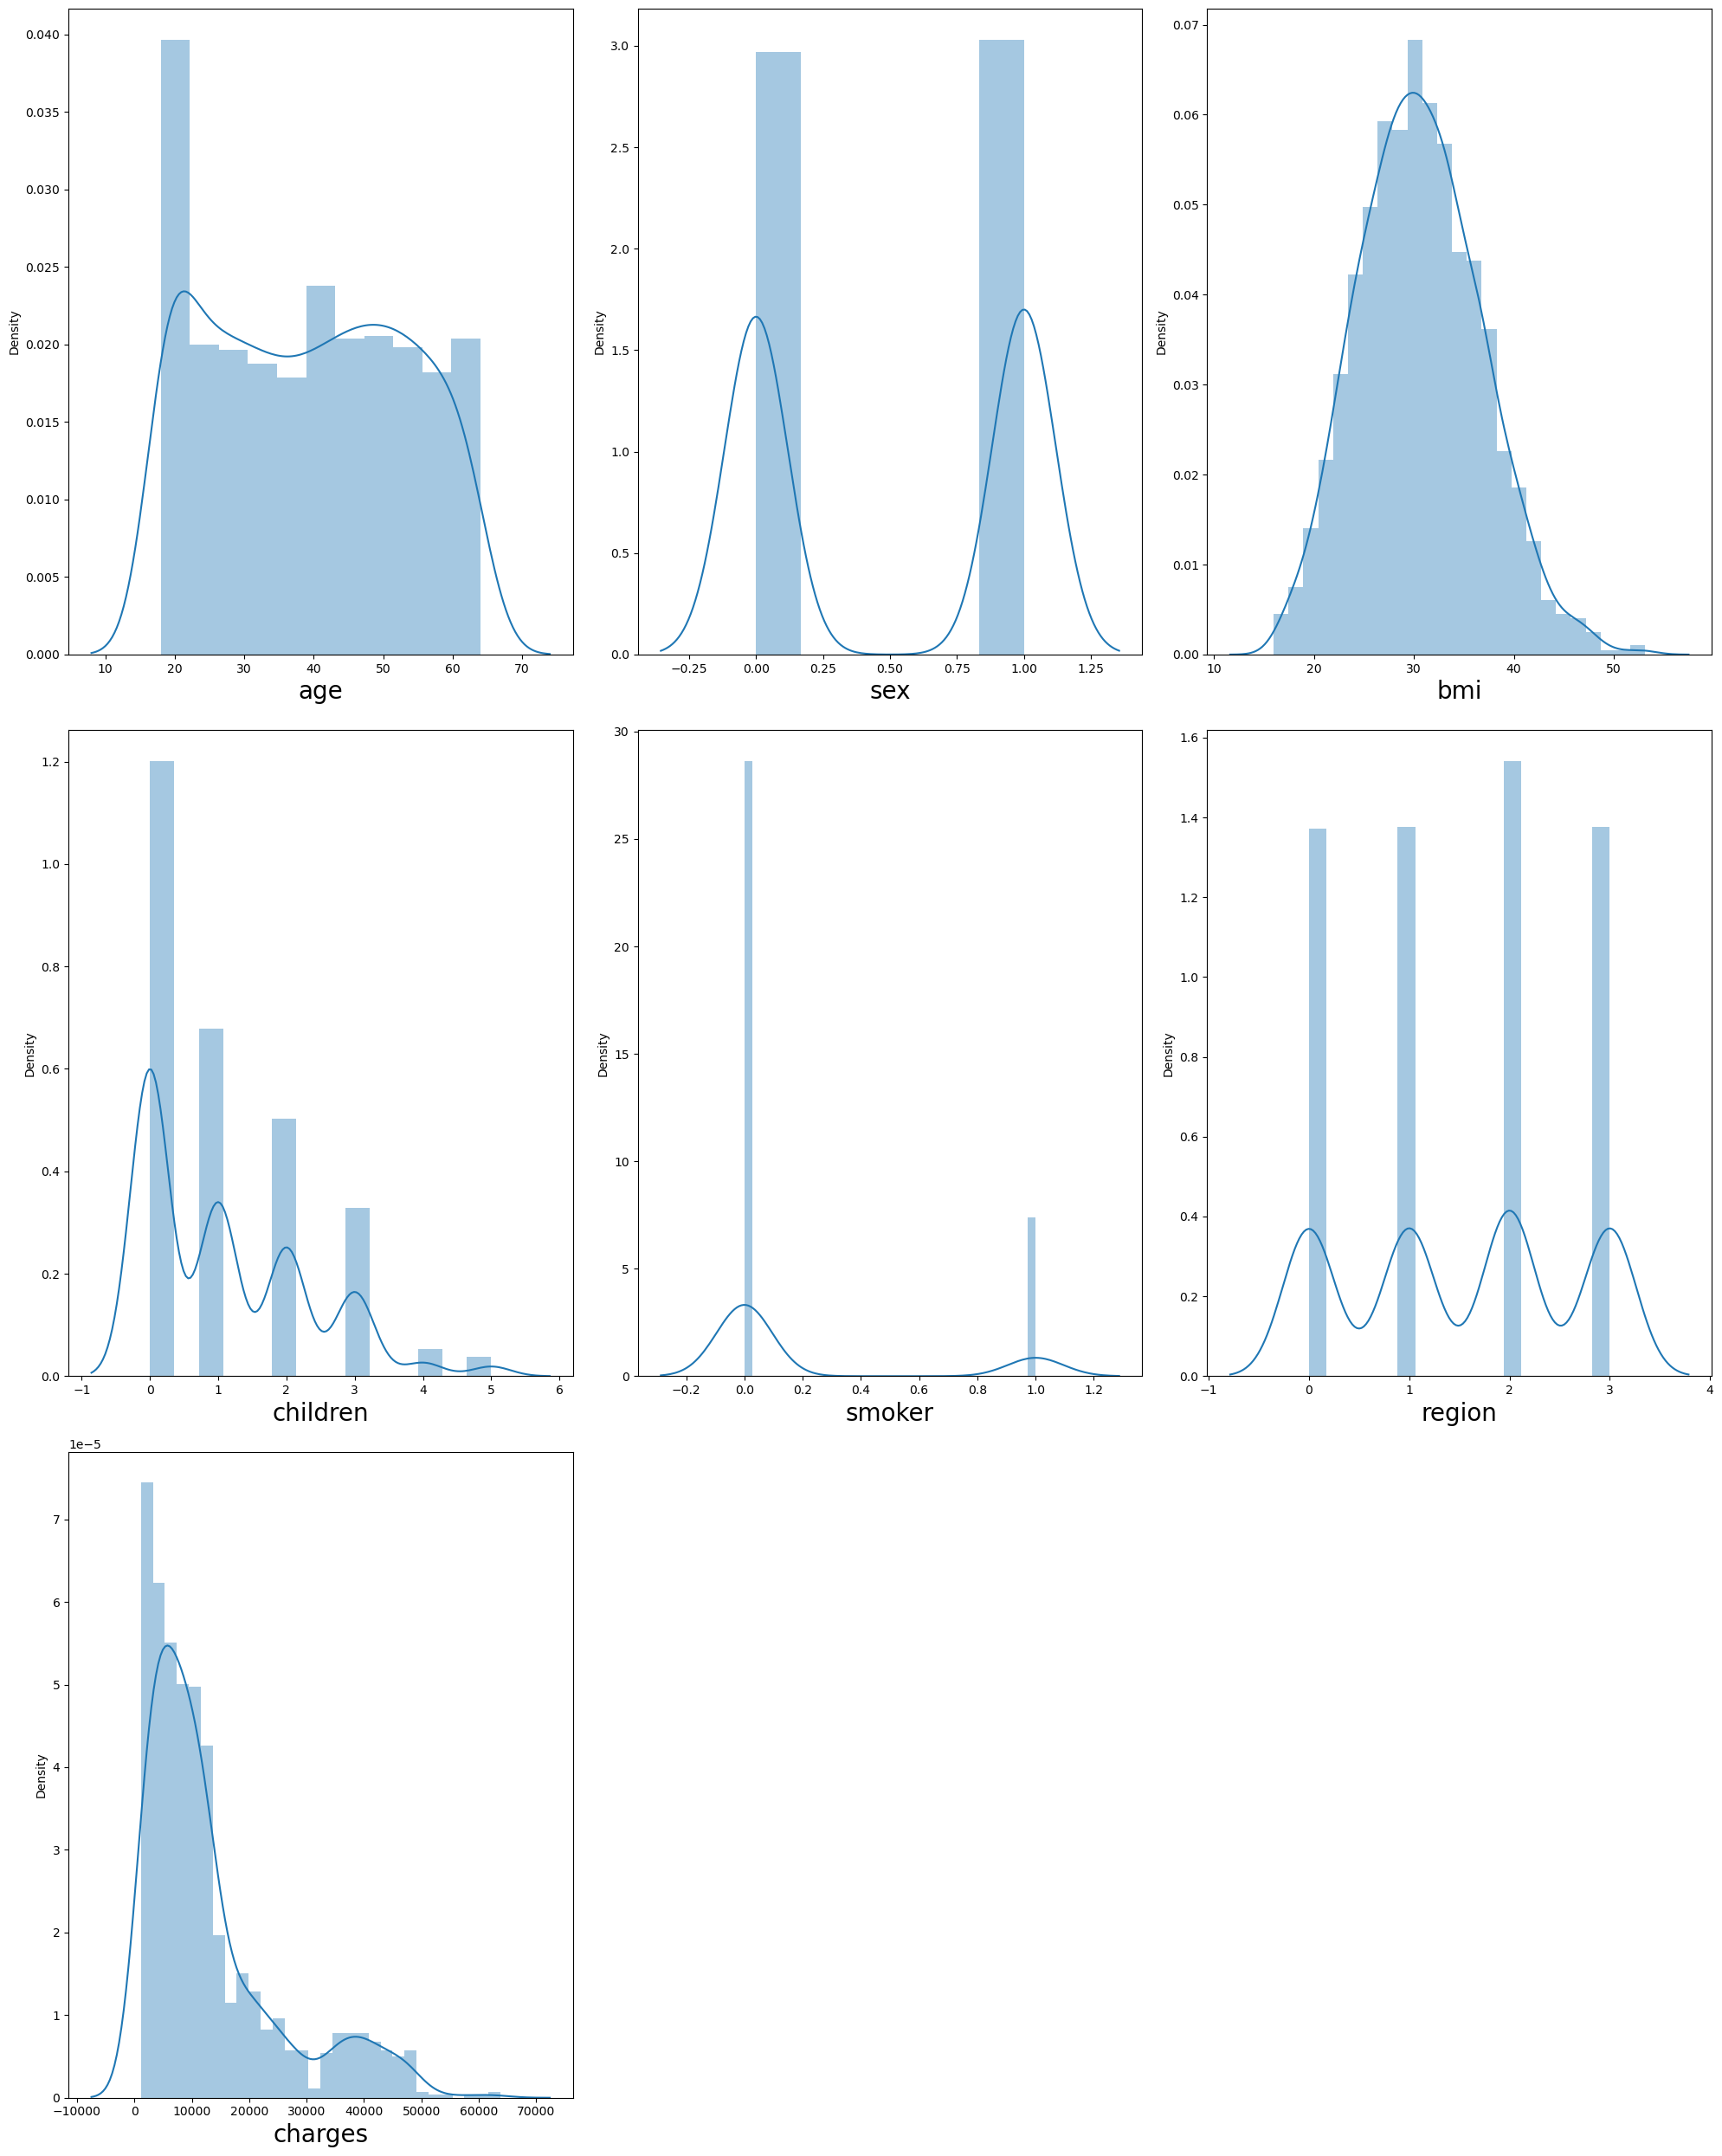

In [19]:
plt.figure(figsize=(20,25),facecolor="w")
plotnumber=1
for i in data:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
data['age']=np.cbrt(data["age"])
data['sex']=np.cbrt(data['sex'])
data['children']=np.cbrt(data['children'])
data['smoker']=np.cbrt(data['smoker'])
data['region']=np.cbrt(data['region'])

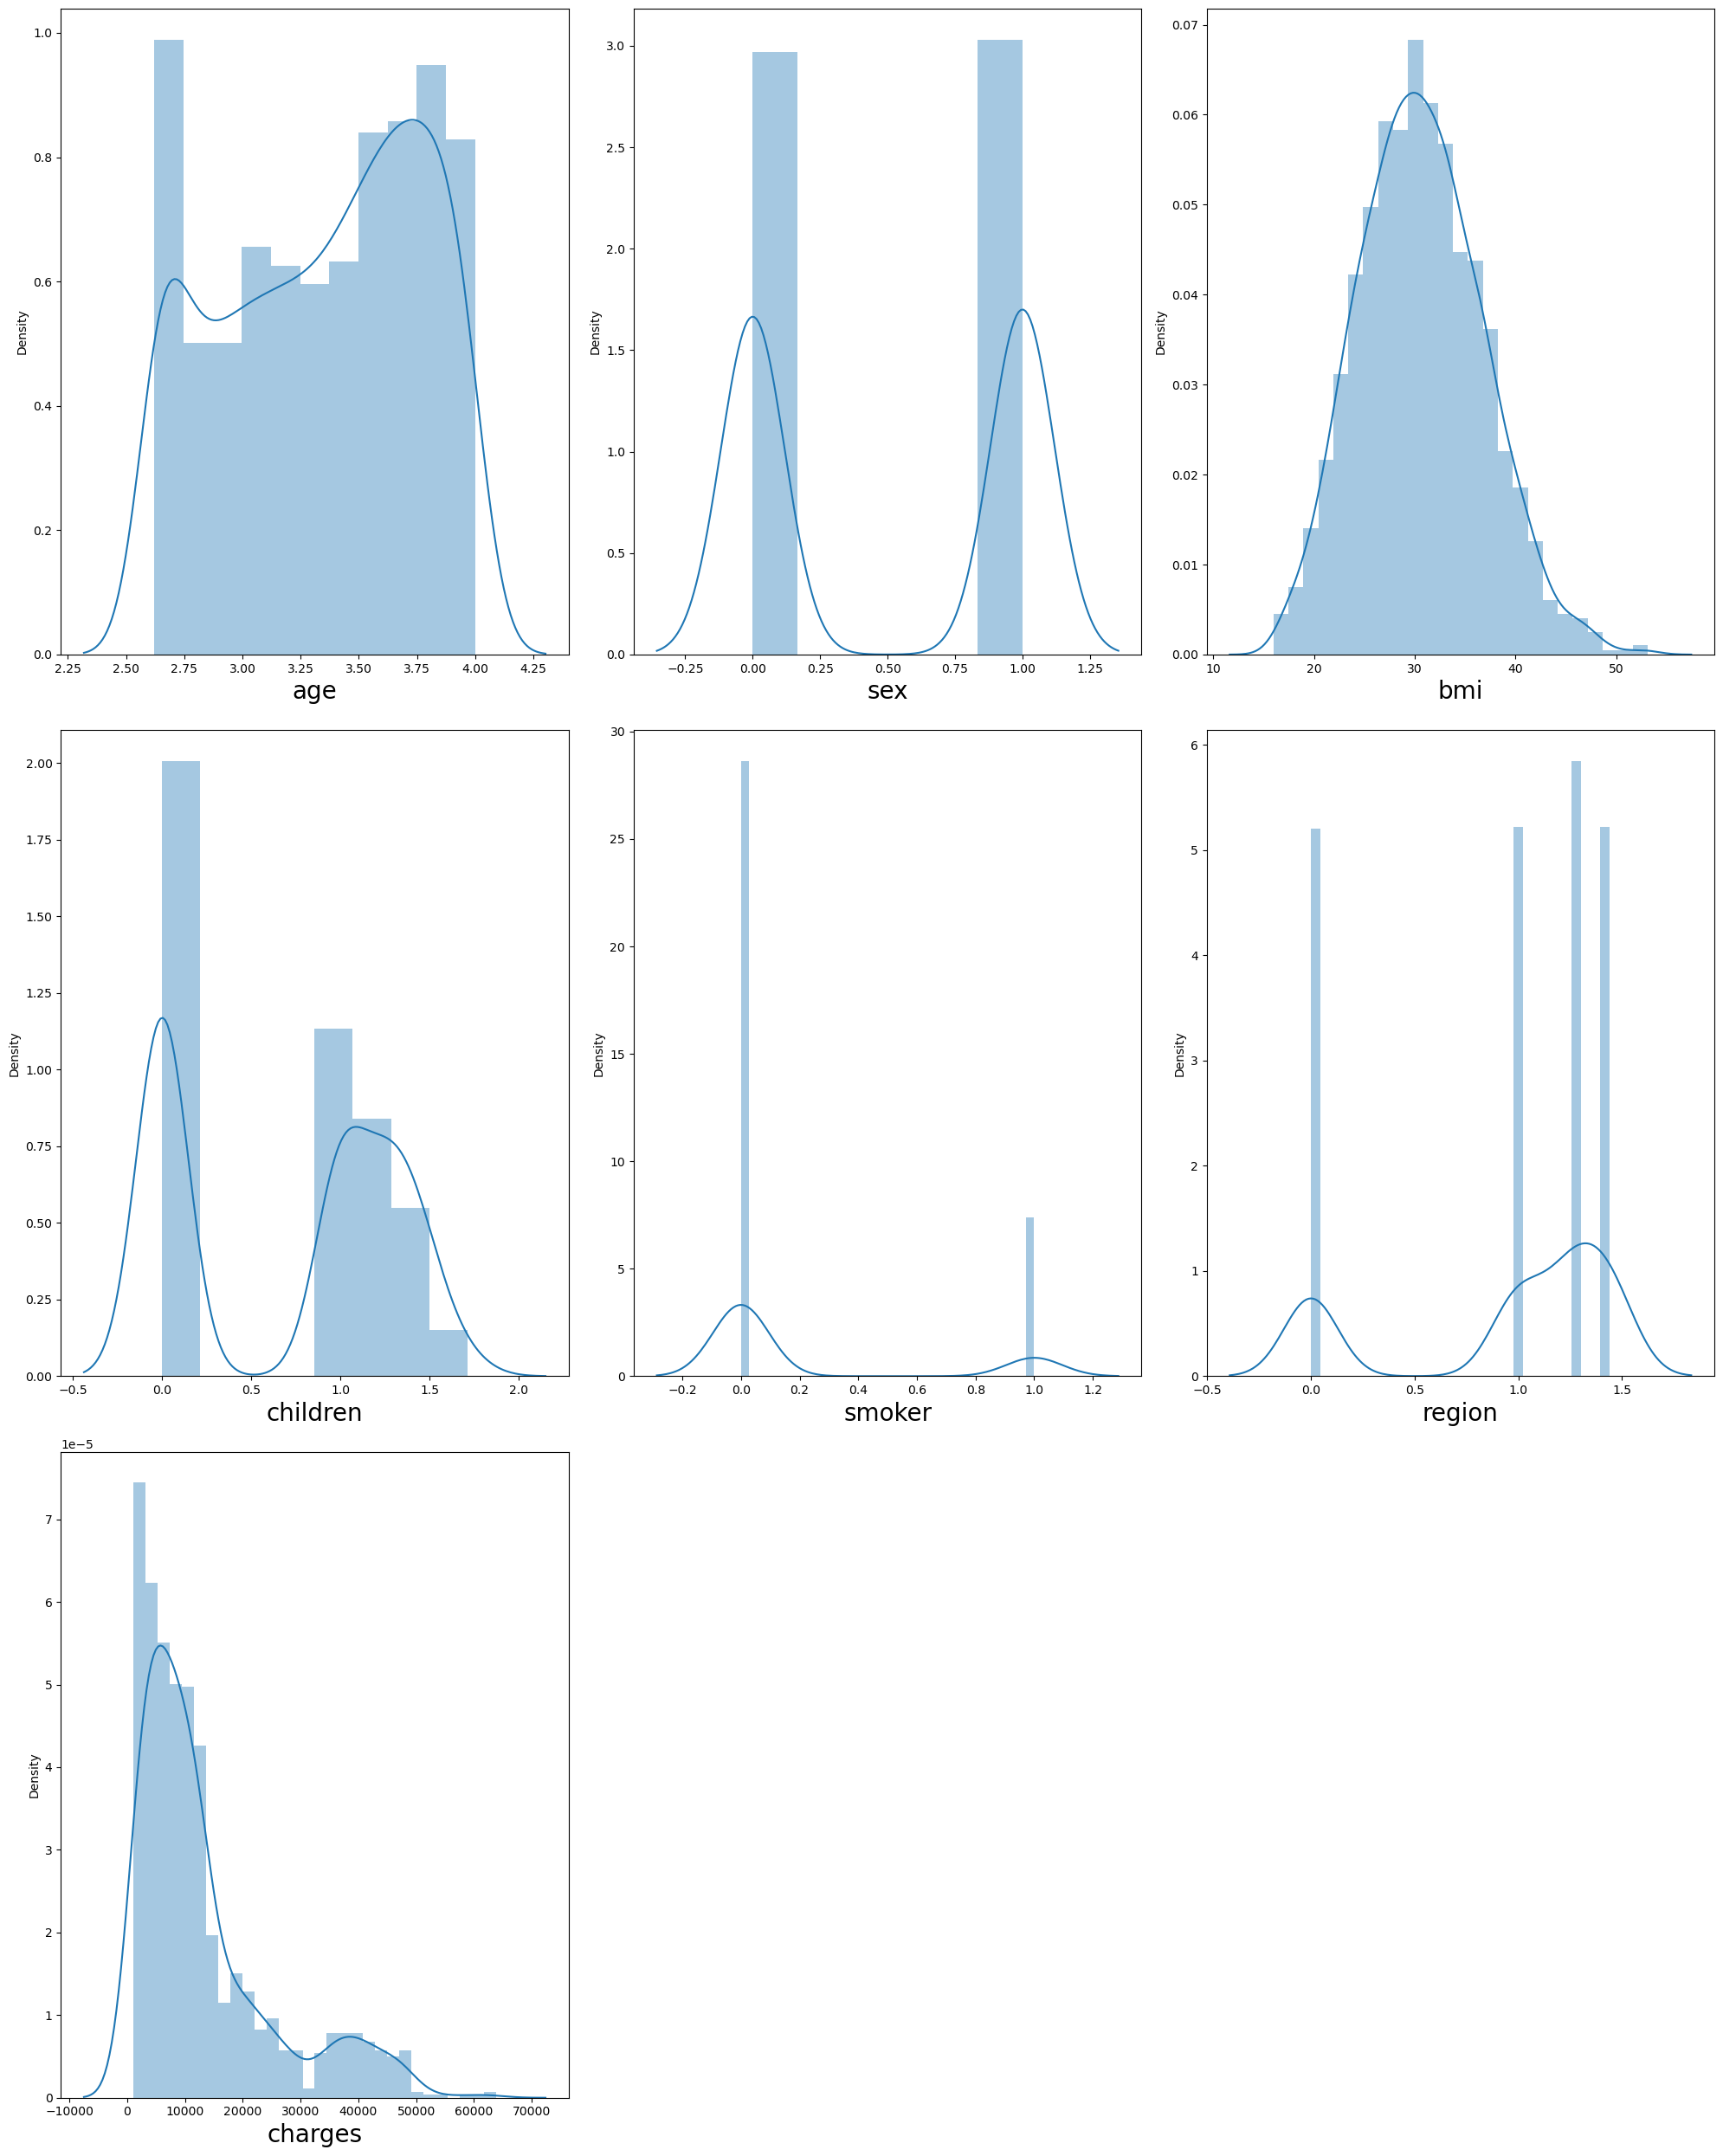

In [21]:
plt.figure(figsize=(20,25),facecolor="w")
plotnumber=1
for i in data:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

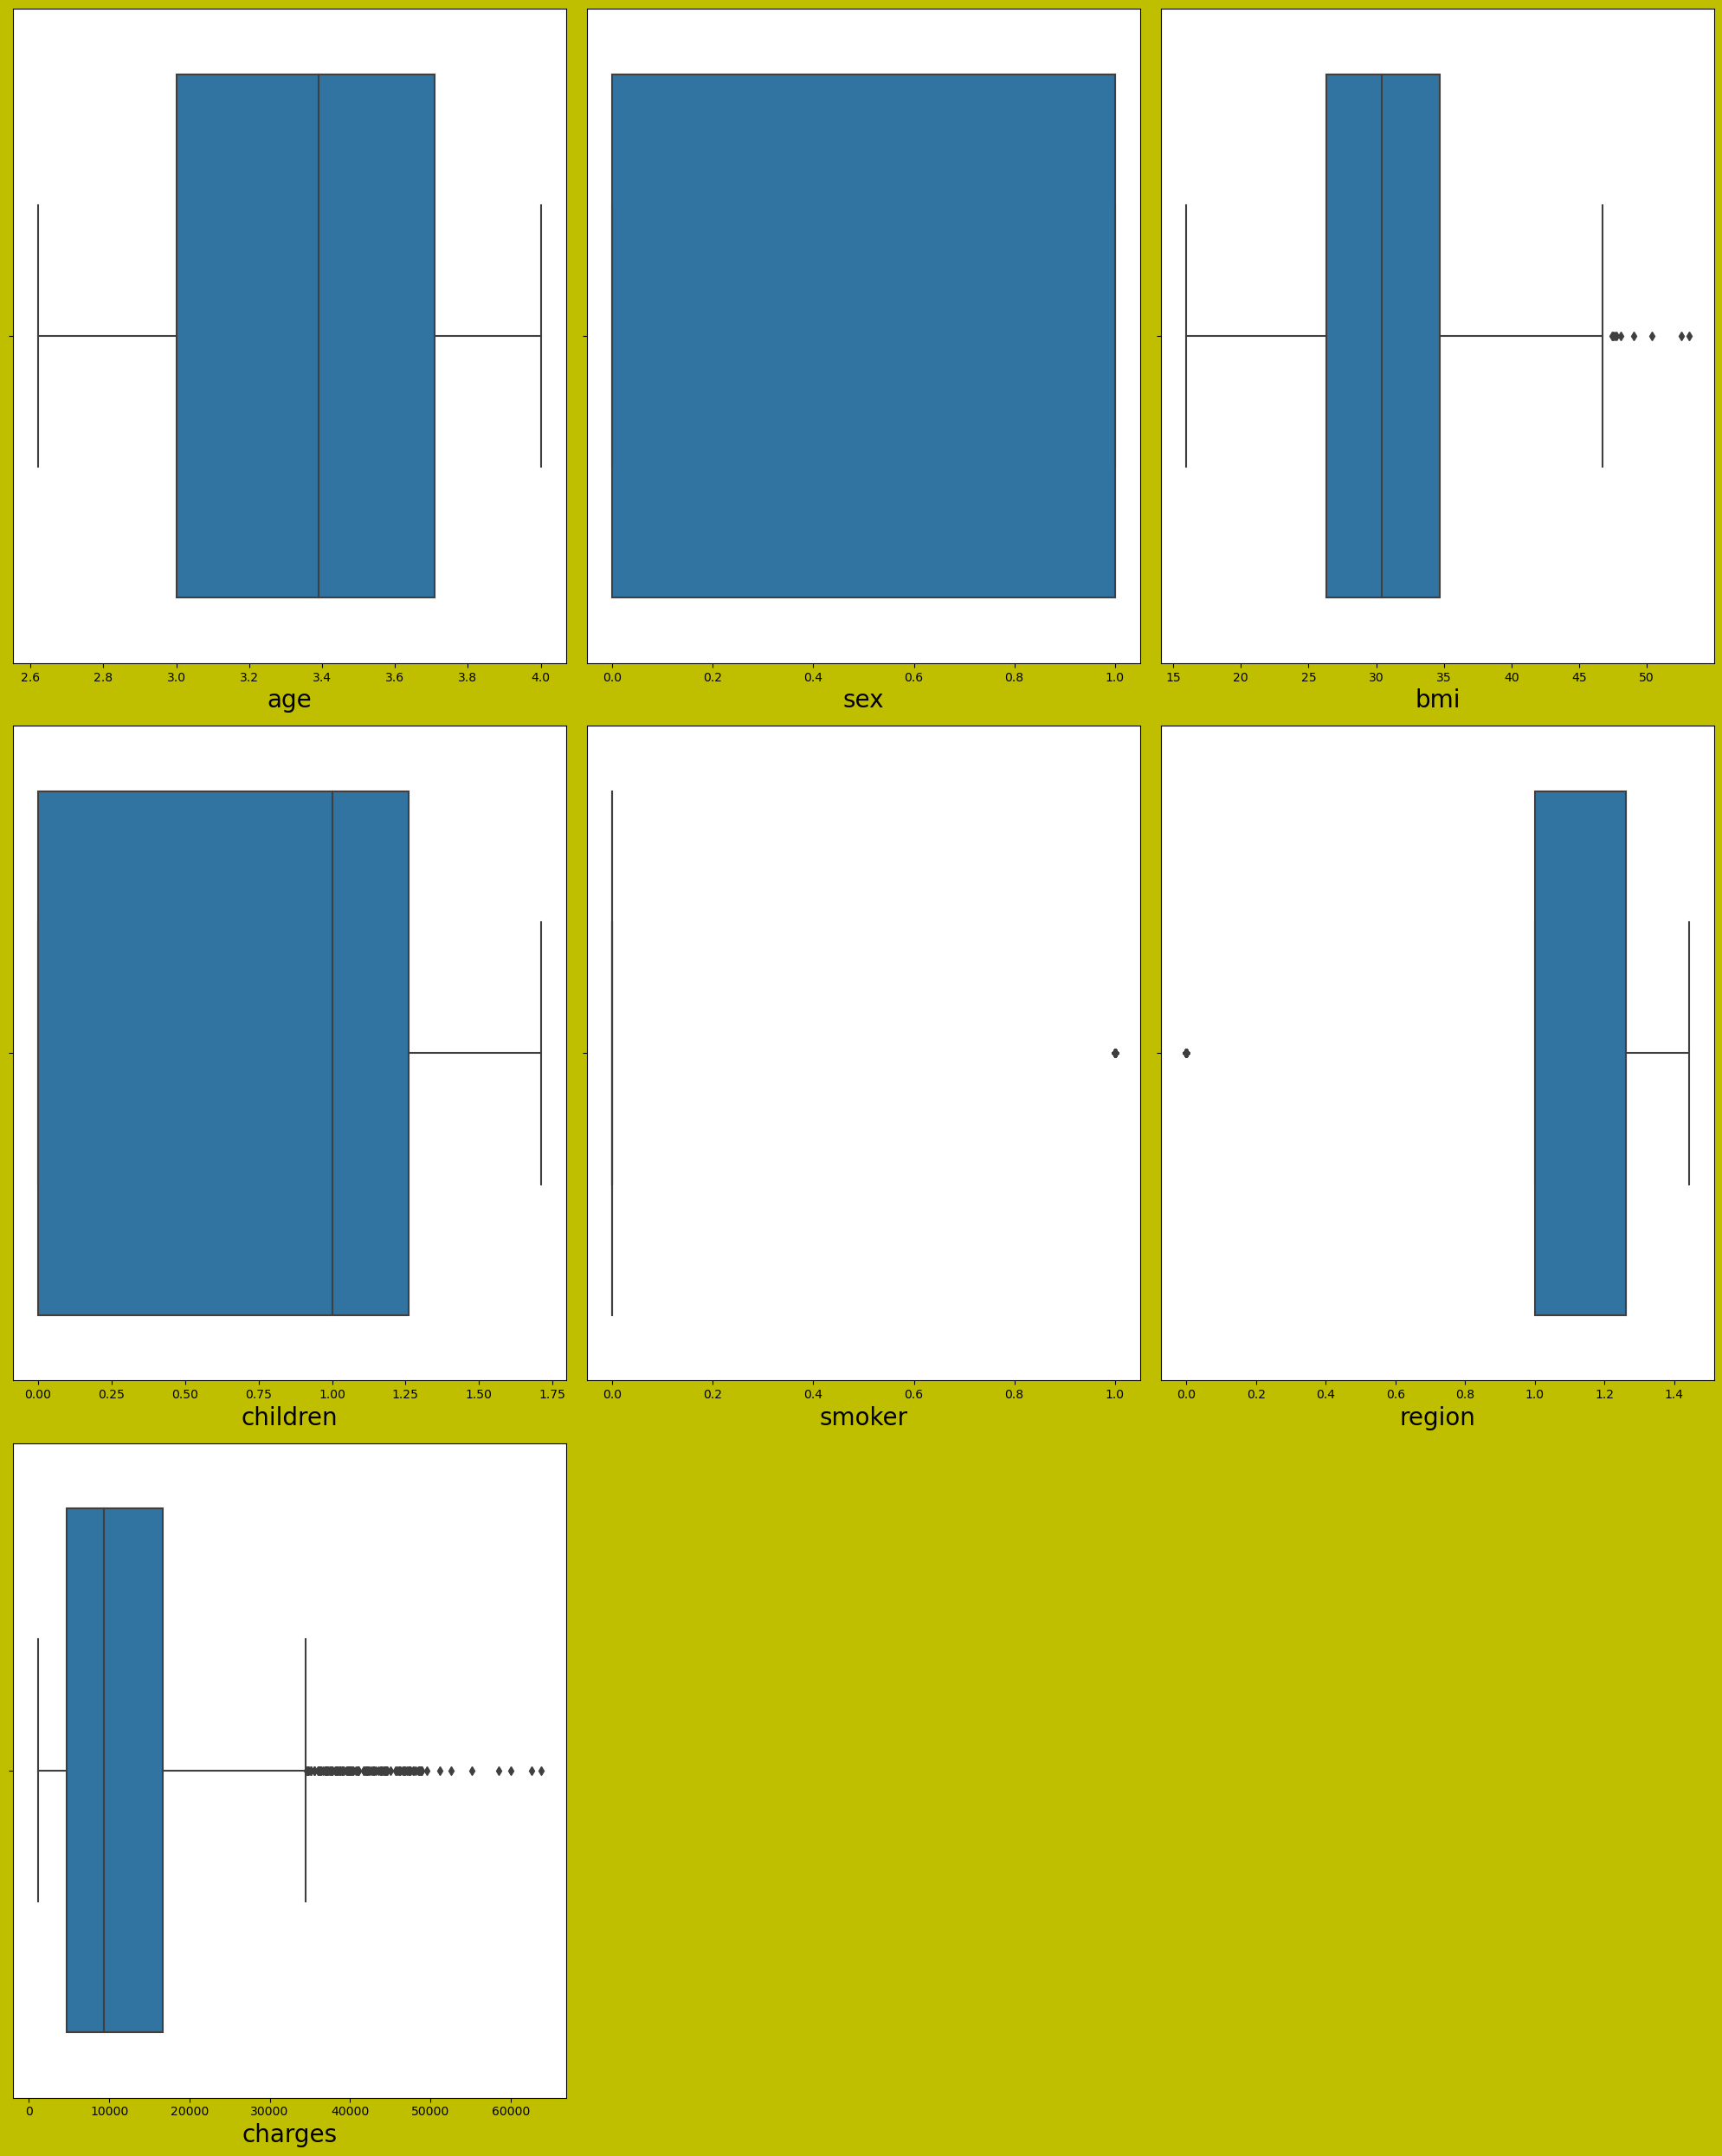

In [22]:
plt.figure(figsize=(20,25),facecolor="y")
plotnumber=1
for i in data:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
q1=data.quantile(.25)
q3=data.quantile(.75)

In [24]:
iqr=q3-q1

In [25]:
iqr

age             0.708430
sex             1.000000
bmi             8.397500
children        1.259921
smoker          0.000000
region          0.259921
charges     11899.625365
dtype: float64

In [26]:
bmi_high=q3.bmi+(1.5*iqr.bmi)
ind_num=np.where(data['bmi']>bmi_high)

In [28]:
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1329, 7)

In [29]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1
iqr

age             0.708430
sex             1.000000
bmi             8.265000
children        1.259921
smoker          0.000000
region          0.259921
charges     11848.229510
dtype: float64

In [30]:
x=data.drop('charges',axis=1)
y=data['charges']

In [31]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaled=StandardScaler()

In [35]:
x_scaled=scaled.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=6)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [42]:
vif['features']=x.columns
vif

,values,features
0,23.187615,age
1,2.014050,sex
2,23.163935,bmi
3,2.263169,children
4,1.259378,smoker
5,3.924155,region


In [46]:
x.drop('age',axis=1,inplace=True)

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
lr.score(x_train,y_train)

0.7428344029970944

In [51]:
lr.score(x_test,y_test)

0.7508785886302431

In [52]:
pred=lr.predict(x_test)

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test,pred)

0.7508785886302431